In [1]:
from scipy import interpolate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# Theory

https://doi.org/10.1016/j.vibspec.2008.01.004

Note: Because the OH absorption peak shifts slightly depending on the OH concentration, the optimal method is to search for the exact T_min, instead measuring the T_min at a fixed wavelength.

In [2]:
def calc_beta(d, t_max, t_min):
    return (1/d) * np.log(t_max/t_min)

def calc_ppm(beta):
    # Molar weight of OH- (g/mol)
    molar = 17
    # Density of glass (g/cm3)
    rho = 2.21
    # Absorption coefficient of OH(L /mol /cm)
    eps = 77.5
    return molar * 10E3 / (eps * rho) * beta

# Experimental
Plot all FTIR data.

<IPython.core.display.Javascript object>


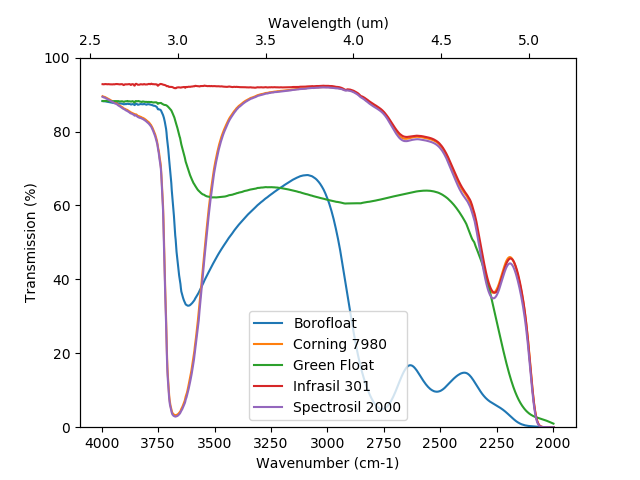

In [3]:
path = './FTIR/'
files = [x for x in os.listdir(path) if '.DPT'in x]

fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

store = {}
for f in files:
    result = np.genfromtxt(path + f)
    f = f.split('.')[0]
    # Wavenumber
    x = result[:, 0]
    # Transmission
    y = result[:, 1]
    ax1.plot(x, 100*y, label=f)

# In wavenumber so x is descending
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')
ax1.legend()
ax2.set_ylim(0, 100)
lb, ub = ax1.get_xlim()
ax2.set_xlim(10000/lb, 10000/ub)
ax2.set_xlabel('Wavelength (um)')

## Infrasil

<IPython.core.display.Javascript object>


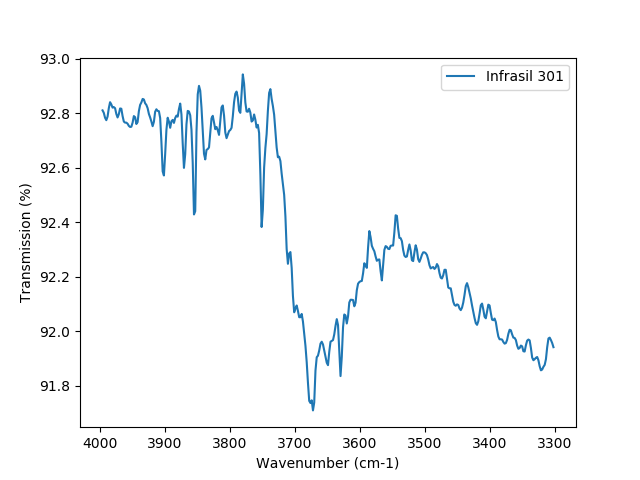

(4030.967486, 3267.205234)

In [4]:
# Load data
path = './FTIR/'
f = [x for x in os.listdir(path) if '.DPT' in x and 'Infrasil' in x][0]
result = np.genfromtxt(path + f)
f = f.split('.')[0]
# Wavenumber (cm-1)
x = result[:, 0]
# Transmission (%)
y = result[:, 1] * 100

# Trim data for only where the absorption band lies
ind = np.where(x>3300)
x = x[ind]
y = y[ind]

# Plot data
fig, ax1 = plt.subplots()
ax1.plot(x, y, label=f)
ax1.legend()
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')
ax1.set_xlim(ax1.get_xlim()[::-1])

<IPython.core.display.Javascript object>


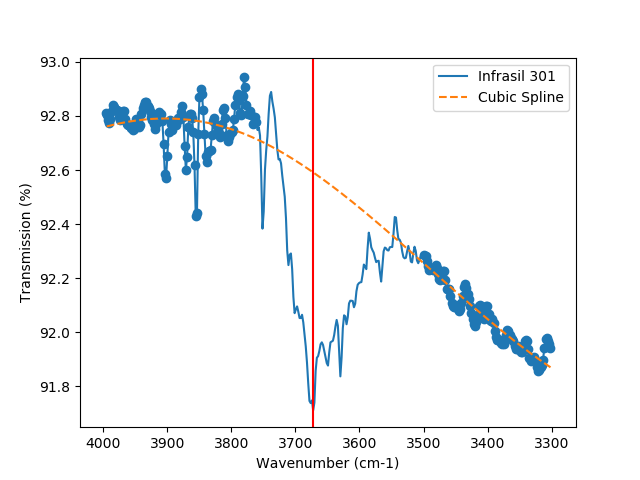

T_min = 91.710%, T_max = 92.591%, peak_height = 0.881%


In [6]:
# Select data eitherside OH absorption to fit the spline to
ind1 = np.where(x<3500)
ind2 = np.where(x>3760)
ind = np.append(ind1, ind2)
x1 = x[ind]
y1 = y[ind]

# Evaluate spline
tck = interpolate.splrep(x1, y1, k=3, s=1)
ynew = interpolate.splev(x, tck, der=0)

# Plot
fig, ax1 = plt.subplots()
ax1.plot(x, y, label=f)
ax1.plot(x, ynew, '--', label='Cubic Spline')
ax1.scatter(x1, y1)
ax1.legend()
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')
ax1.set_xlim(ax1.get_xlim()[::-1])

# Search for peak wavelength, T_min, T_max and peak height
diff = y - ynew
loc = np.where(diff == min(diff))[0][0]
ax1.axvline(x[loc], color='r')
t_min = y[loc]
t_max = ynew[loc]
peak_height = ynew[loc]- y[loc]
print('T_min = {:.3f}%, T_max = {:.3f}%, peak_height = {:.3f}%'.format(t_min, t_max, peak_height))

<IPython.core.display.Javascript object>


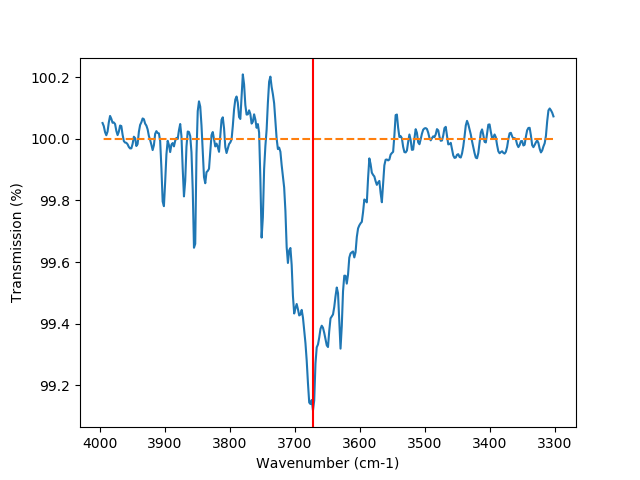

In [7]:
# Normalise baseline and re-plot
delta = 100 - ynew

fig, ax1 = plt.subplots()
ax1.plot(x, y + delta, label=f)
ax1.plot(x, ynew + delta, '--', label='Cubic Spline')
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.axvline(x[loc], color='r')

In [9]:
# Thickness of samples (mm)
d = 1.1 

beta = calc_beta(d, t_max, t_min)
print('Optical density, beta, = {:.4e} mm-1'.format(beta))

ppm = calc_ppm(beta)
print('OH (ppm) = {:.4f}'.format(ppm))

Optical density, beta, = 8.6944e-03 mm-1
OH (ppm) = 8.6297


## Spectrosil

<IPython.core.display.Javascript object>


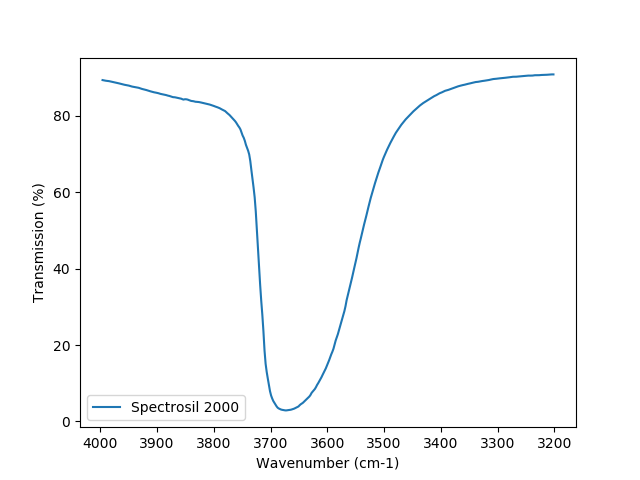

(4035.9820870000003, 3161.8986129999998)

In [10]:
# Load data
path = './FTIR/'
f = [x for x in os.listdir(path) if '.DPT' in x and 'Spectrosil' in x][0]
result = np.genfromtxt(path + f)
f = f.split('.')[0]
# Wavenumber (cm-1)
x = result[:, 0]
# Transmission (%)
y = result[:, 1] * 100

# Trim data for only where the absorption band lies
ind = np.where(x>3200)
x = x[ind]
y = y[ind]

# Plot data
fig, ax1 = plt.subplots()
ax1.plot(x, y, label=f)
ax1.legend()
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')
ax1.set_xlim(ax1.get_xlim()[::-1])

<IPython.core.display.Javascript object>


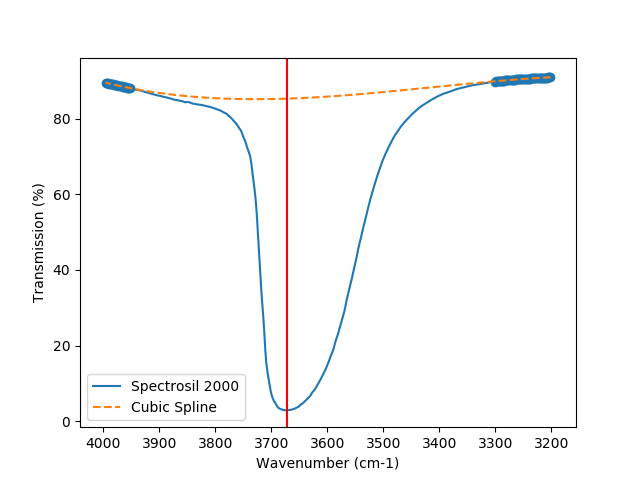

T_min = 2.875%, T_max = 85.258%, peak_height = 82.383%


In [11]:
# Select data eitherside OH absorption to fit the spline to
ind1 = np.where(x<3300)
ind2 = np.where(x>3950)
ind = np.append(ind1, ind2)
x1 = x[ind]
y1 = y[ind]

# Evaluate spline
tck = interpolate.splrep(x1, y1, k=3, s=1)
ynew = interpolate.splev(x, tck, der=0)

# Plot
fig, ax1 = plt.subplots()
ax1.plot(x, y, label=f)
ax1.plot(x, ynew, '--', label='Cubic Spline')
ax1.scatter(x1, y1)
ax1.legend()
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')
ax1.set_xlim(ax1.get_xlim()[::-1])

# Search for peak wavelength, T_min, T_max and peak height
diff = y - ynew
loc = np.where(diff == min(diff))[0][0]
ax1.axvline(x[loc], color='r')
t_min = y[loc]
t_max = ynew[loc]
peak_height = ynew[loc]- y[loc]
print('T_min = {:.3f}%, T_max = {:.3f}%, peak_height = {:.3f}%'.format(t_min, t_max, peak_height))

<IPython.core.display.Javascript object>


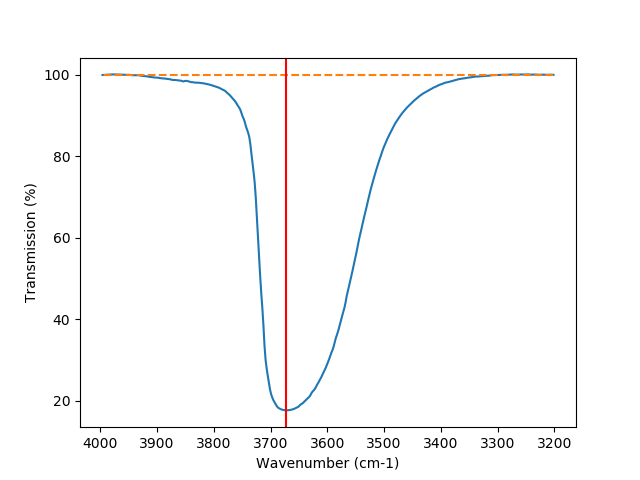

In [12]:
# Normalise baseline and re-plot
delta = 100 - ynew

fig, ax1 = plt.subplots()
ax1.plot(x, y + delta, label=f)
ax1.plot(x, ynew + delta, '--', label='Cubic Spline')
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.axvline(x[loc], color='r')

In [15]:
# Thickness of samples (mm)
d = 1.1 

beta = calc_beta(d, t_max, t_min)
print('Optical density, beta, = {:.4e} mm-1'.format(beta))

ppm = calc_ppm(beta)
print('OH (ppm) = {:.4f}'.format(ppm))

Optical density, beta, = 3.0815e+00 mm-1
OH (ppm) = 3058.5449
